In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the data into a dataframe
df = pd.read_csv('titanic.csv')
print(df.info)

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                

In [3]:
# check for missing values
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [4]:
# Fill missing values age with median age
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'],inplace=True)

df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])


In [5]:
# check for missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [6]:
df['Gender'] = df['Gender'].map({'male':1,'female':0})

In [7]:
df.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
899,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,C


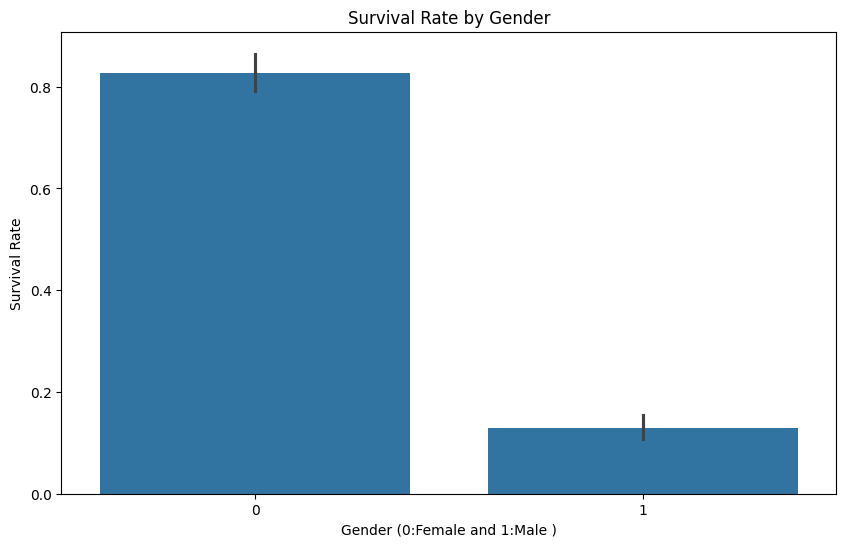

In [8]:
# plot the Survival
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Survived',data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0:Female and 1:Male )")
plt.ylabel("Survival Rate")
plt.show()


In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']+1

df['AgeGroup'] = pd.cut(df['Age'],bins=[0,12,20,40,60,80],labels=['0-12','13-20','21-40','41-60','61-80'])
df.sample()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeGroup
786,787,1,3,"Sjoblom, Miss. Anna Sofia",0,18.0,0,0,3101265,7.4958,S,1,13-20


In [16]:
features = ['Pclass','Gender','Fare','Age','FamilySize','Embarked']
x = df[features]
y = df['Survived']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

rfc = RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(x_train,y_train)
y_preds = rfc.predict(x_test)
print(f"Accuracy is {accuracy_score(y_test,y_preds)*100}")
print(f"\n{classification_report(y_test,y_preds)}")




ValueError: could not convert string to float: 'S'